<a href="https://colab.research.google.com/github/sunyux/Neural-network-for-MNIST/blob/main/NN%20for%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import random
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

In [ ]:
from keras.optimizers import gradient_descent_v2

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:

def get_data():  
   #get mnist data from keras 
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    #get the whole size of MNIST train set
    whole_size=len(x_train)
    print(whole_size)
    #choose the size of train, 0.5 is half, 0.25 is quarter 
    zoom_out=0.5
    number=int(whole_size * zoom_out)
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    #Preprocessing: Scale the data values to be between 0 and 1 by dividing by 255
    x_train = x_train.astype('float32')/255
    x_test = x_test.astype('float32')/255
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = get_data()

get_data()

60000
(30000, 28, 28)
(30000, 10)
(10000, 28, 28)
(10000, 10)
60000
(30000, 28, 28)
(30000, 10)
(10000, 28, 28)
(10000, 10)


((array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
         

In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [ ]:
# Neural network
input_layer = Input(shape=(28,28))
x = Flatten()(input_layer)
x = Dense(units=100, activation = 'sigmoid')(x)
output_layer = Dense(units=10, activation = 'sigmoid')(x)
model = Model(input_layer, output_layer)

In [ ]:
# compile mode
opt = gradient_descent_v2.SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=50, batch_size=64)

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.4444 - accuracy: 0.8669 - val_loss: 0.2518 - val_accuracy: 0.9245
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2250 - accuracy: 0.9334 - val_loss: 0.2121 - val_accuracy: 0.9365
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1712 - accuracy: 0.9498 - val_loss: 0.1641 - val_accuracy: 0.9500
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1376 - accuracy: 0.9587 - val_loss: 0.1383 - val_accuracy: 0.9595
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9675 - val_loss: 0.1259 - val_accuracy: 0.9629
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0944 - accuracy: 0.9722 - val_loss: 0.1209 - val_accuracy: 0.9633
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0805 - accuracy: 0.9775 - val_loss: 0.1193 - val_accuracy: 0.9638
Epoch 

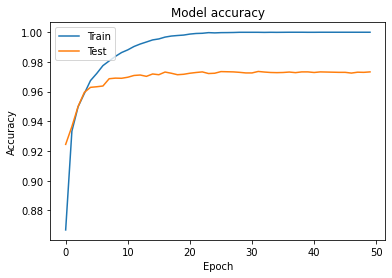

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 965    0    0    2    1    1    4    2    3    2]
 [   0 1123    4    0    0    1    3    1    3    0]
 [   5    0 1007    3    2    0    1    7    7    0]
 [   0    0    8  981    0    7    0    8    3    3]
 [   1    0    3    2  957    0    4    2    2   11]
 [   3    1    0   13    2  856    9    1    4    3]
 [   6    2    1    1    3    7  933    1    4    0]
 [   1    5    9    3    0    1    0  997    5    7]
 [   4    0    2    6    3    3    4    5  945    2]
 [   3    3    1    6   12    6    1    6    2  969]]
